# Figure - 3 

In [1]:
!cd /home/jovyan/jm_jlab/

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

import celloracle as co
co.__version__

# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#plt.rcParams['figure.figsize'] = (15,7)
#plt.rcParams["savefig.dpi"] = 600

save_folder = "/home/jovyan/jm_jlab/data_indNeuro/1.GRN/"
os.makedirs(save_folder, exist_ok=True)

from pathlib import Path

sc._settings.ScanpyConfig.cachedir = Path('/home/jovyan/jm_jlab/celloracle_data/cache')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Trevino 2021

In [2]:
links = co.load_hdf5(file_path="/home/jovyan/jm_jlab/data_indNeuro/1.GRN/milestones_pcw16_baggindridge.celloracle.links")

In [14]:
#For consistency with scFates

dict({'IPC': "#FF7F0E", "oRG": "#279E68", 'transient': '#0000FF', "vRG": '#D62728'})

{'IPC': '#FF7F0E', 'oRG': '#279E68', 'transient': '#0000FF', 'vRG': '#D62728'}

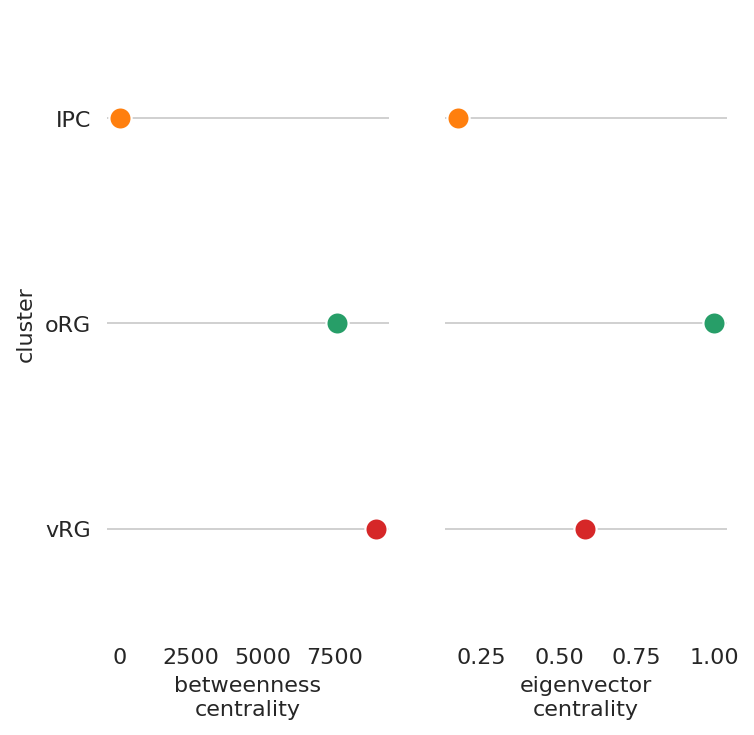

In [24]:
plt.figure(figsize=(5, 5), dpi=80)

goi = "KLF6"
res = links.merged_score[links.merged_score.index==goi].copy()
res = res[res['cluster'] != "transient"].copy()

res = res.rename(columns={"betweenness_centrality": "betweenness\ncentrality",
             "eigenvector_centrality": "eigenvector\ncentrality"})
# make plots
values = ["betweenness\ncentrality",
          "eigenvector\ncentrality"]


for i, value in zip([1, 2], values):
        plt.subplot(1, 2,  i)
        ax = sns.stripplot(data=res, y="cluster", x=value,
                      size=10, orient="h",linewidth=1, edgecolor="w",
                      order=np.array(['IPC', 'oRG', 'vRG']), # Remove 'transient'
                      palette=dict({'IPC': "#FF7F0E", "oRG": "#279E68", 'transient': '#0000FF', "vRG": '#D62728'}))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.yaxis.grid(True)
        ax.tick_params(bottom=False,
                        left=False,
                        right=False,
                        top=False)
        if i > 1:
            plt.ylabel(None)
            ax.tick_params(labelleft=False)

plt.show()

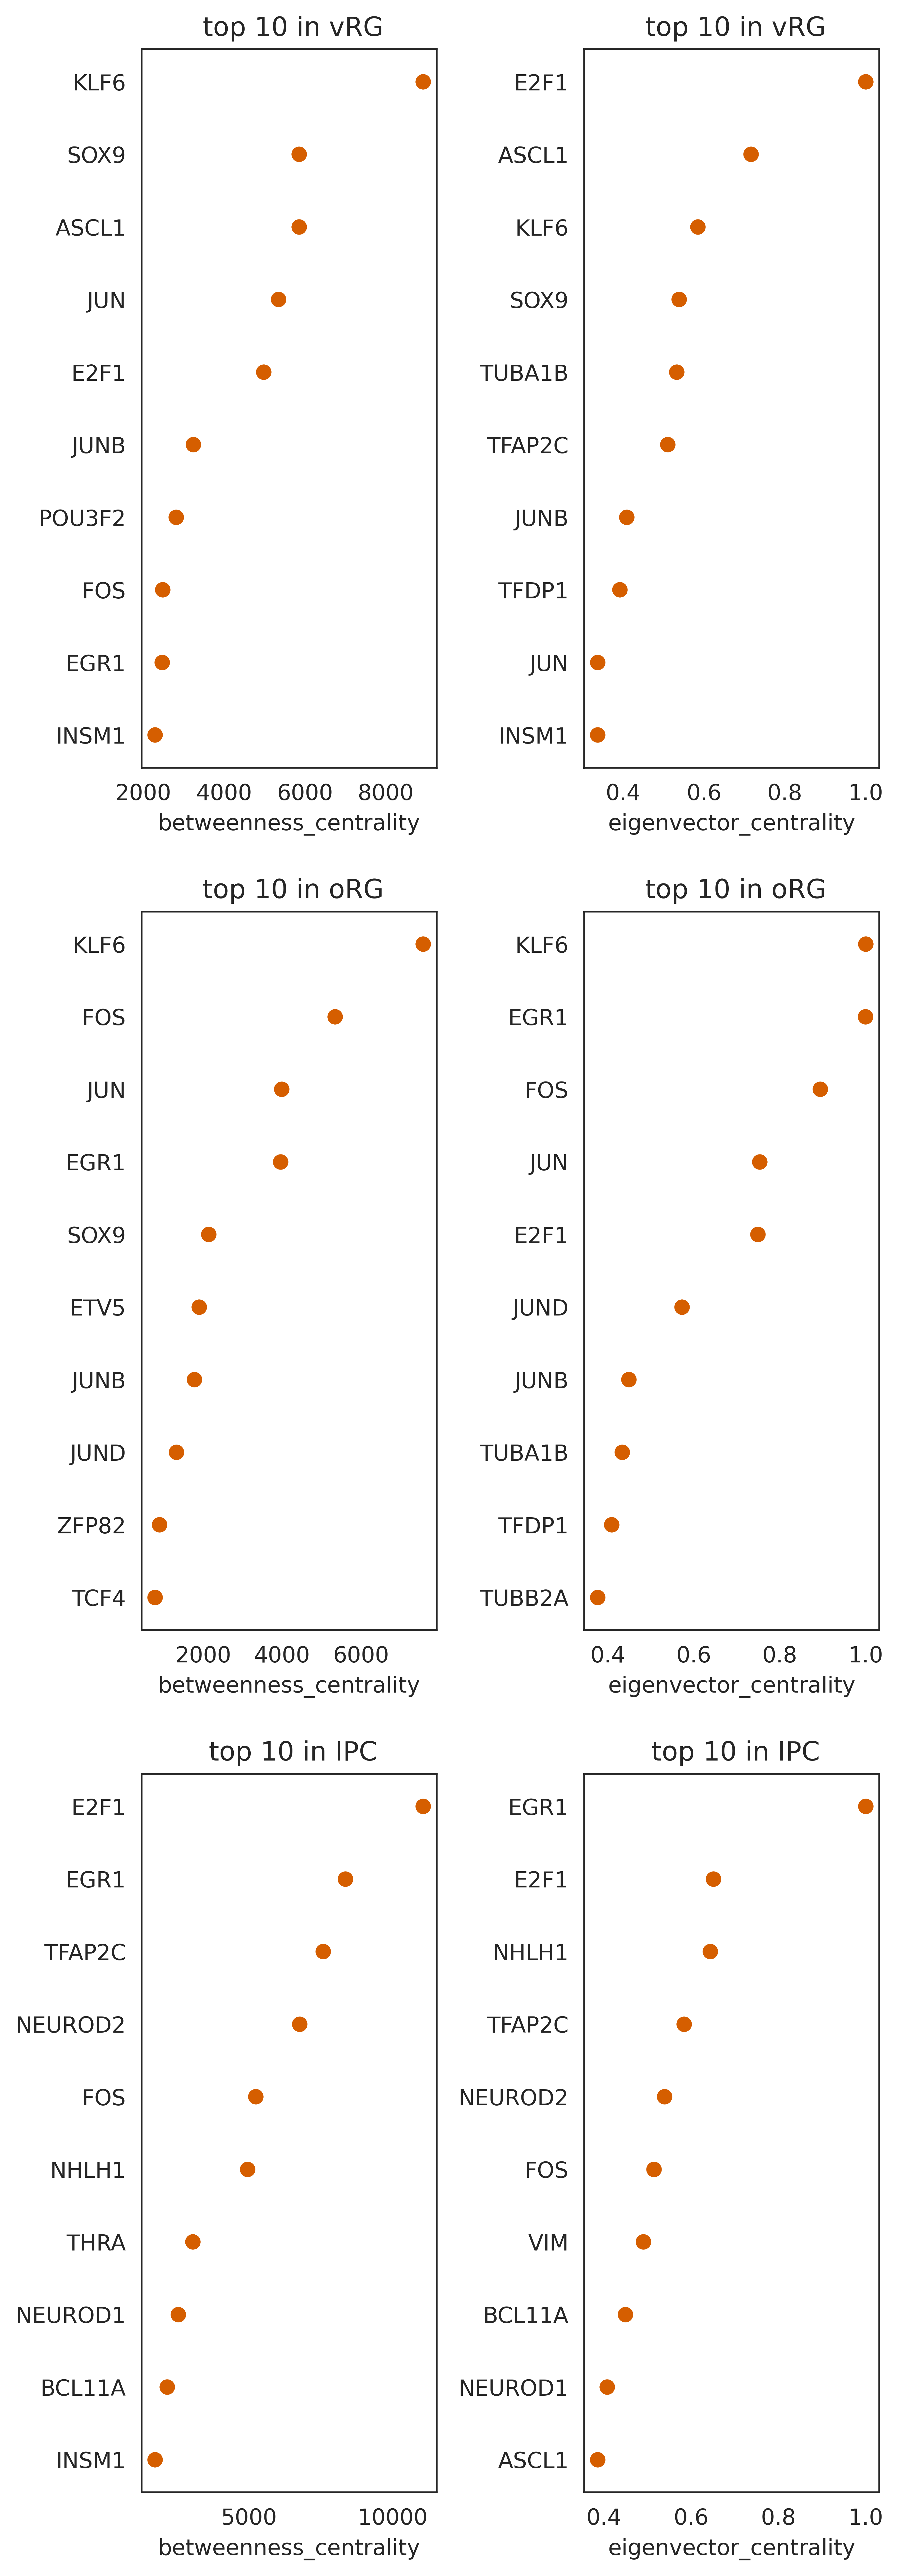

In [11]:
n_gene = 10
values = ['betweenness_centrality',  'eigenvector_centrality']

fig, axs = plt.subplots(3, 2, figsize=(6, 20), dpi=300)

cluster = 'vRG'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[0,0].scatter(res.values, range(len(res)), color="#d55e00")
axs[0,0].set_yticks(range(len(res)))
axs[0,0].set_yticklabels(res.index.values)
axs[0,0].set_xlabel(values[0])
axs[0,0].set_title(f" top {n_gene} in {cluster}")
axs[0,0].invert_yaxis()

cluster = 'vRG'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[0,1].scatter(res.values, range(len(res)), color="#d55e00")
axs[0,1].set_yticks(range(len(res)))
axs[0,1].set_yticklabels(res.index.values)
axs[0,1].set_xlabel(values[1])
axs[0,1].set_title(f" top {n_gene} in {cluster}")
axs[0,1].invert_yaxis()

cluster = 'oRG'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[1,0].scatter(res.values, range(len(res)), color="#d55e00")
axs[1,0].set_yticks(range(len(res)))
axs[1,0].set_yticklabels(res.index.values)
axs[1,0].set_xlabel(values[0])
axs[1,0].set_title(f" top {n_gene} in {cluster}")
axs[1,0].invert_yaxis()

cluster = 'oRG'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[1,1].scatter(res.values, range(len(res)), color="#d55e00")
axs[1,1].set_yticks(range(len(res)))
axs[1,1].set_yticklabels(res.index.values)
axs[1,1].set_xlabel(values[1])
axs[1,1].set_title(f" top {n_gene} in {cluster}")
axs[1,1].invert_yaxis()


cluster = 'IPC'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[2,0].scatter(res.values, range(len(res)), color="#d55e00")
axs[2,0].set_yticks(range(len(res)))
axs[2,0].set_yticklabels(res.index.values)
axs[2,0].set_xlabel(values[0])
axs[2,0].set_title(f" top {n_gene} in {cluster}")
axs[2,0].invert_yaxis()

cluster = 'IPC'
res = links.merged_score[links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[2,1].scatter(res.values, range(len(res)), color="#d55e00")
axs[2,1].set_yticks(range(len(res)))
axs[2,1].set_yticklabels(res.index.values)
axs[2,1].set_xlabel(values[1])
axs[2,1].set_title(f" top {n_gene} in {cluster}")
axs[2,1].invert_yaxis()


plt.subplots_adjust(wspace=0.5)

In [29]:
def plot_indNeuro_GRNmeasures(links, 
                              value, 
                              cluster1, 
                              cluster2, 
                              percentile=99, 
                              fillna_with_zero=True):
    """
   Scatter plot similar to that available from CellOracle but highlighting top genes
    Args:
        links (Links object): See network_analisis.Links class for detail.
        value (srt): The network score to be shown.
        cluster1 (str): Cluster nome to analyze. Network scores in the cluste1 are shown as x-axis.
        cluster2 (str): Cluster nome to analyze. Network scores in the cluste2 are shown as y-axis.
        percentile (float): Genes with a network score above the percentile will be shown with annotation. Default is 99.
    """

    res = links.merged_score[links.merged_score.cluster.isin([cluster1, cluster2])][[value, "cluster"]]
    res = res.reset_index(drop=False)
    piv = pd.pivot_table(res, values=value, columns="cluster", index="index")
    if fillna_with_zero:
        piv = piv.fillna(0)
    else:
        piv = piv.fillna(piv.mean(axis=0))

    goi1 = piv[piv[cluster1] > np.percentile(piv[cluster1].values, percentile)].index
    goi2 = piv[piv[cluster2] > np.percentile(piv[cluster2].values, percentile)].index
    gois = np.union1d(goi1, goi2)

    x, y = piv[cluster1], piv[cluster2]
    
    y1 = pd.DataFrame(y)

    x1 = pd.DataFrame(x)
    xy = pd.merge(x1, y1, on='index')

    # find top 10 values for cluster 1 and cluster 2
    top10_cluster1 = xy.nlargest(10, cluster1)
    top10_cluster2 = xy.nlargest(10, cluster2)

    # create a boolean column that is TRUE for genes in top 10 in either cluster 1 or cluster 2
    xy['top10'] = False
    xy.loc[top10_cluster1.index, 'top10'] = True
    xy.loc[top10_cluster2.index, 'top10'] = True

    #Better visualization of top values
    binary_colors = ['#d55e00' if top10 else '#808080' for top10 in xy['top10']]
    
    plt.scatter(xy[cluster1], xy[cluster2], c=binary_colors) #top10 for each cluster

    for gene_name in xy.index[xy['top10'] == True]:
        plt.annotate(gene_name, (xy.loc[gene_name, cluster1], xy.loc[gene_name, cluster2]), 
                 textcoords='offset points', 
                 xytext=(5,0), 
                 ha='left', 
                 va='bottom')

    plt.xlabel(cluster1)
    plt.ylabel(cluster2)
    plt.title("")

    # show the plot
    plt.show()

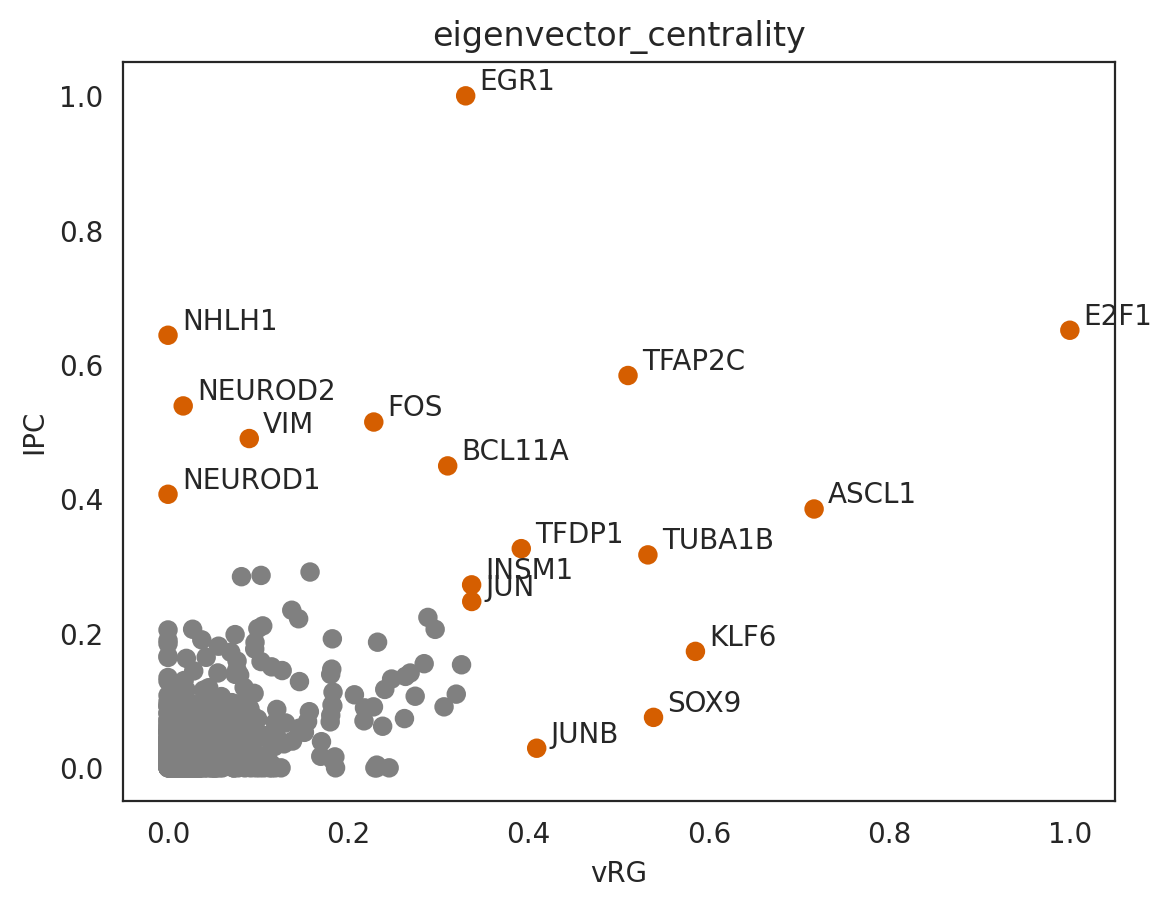

In [148]:
plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='IPC')

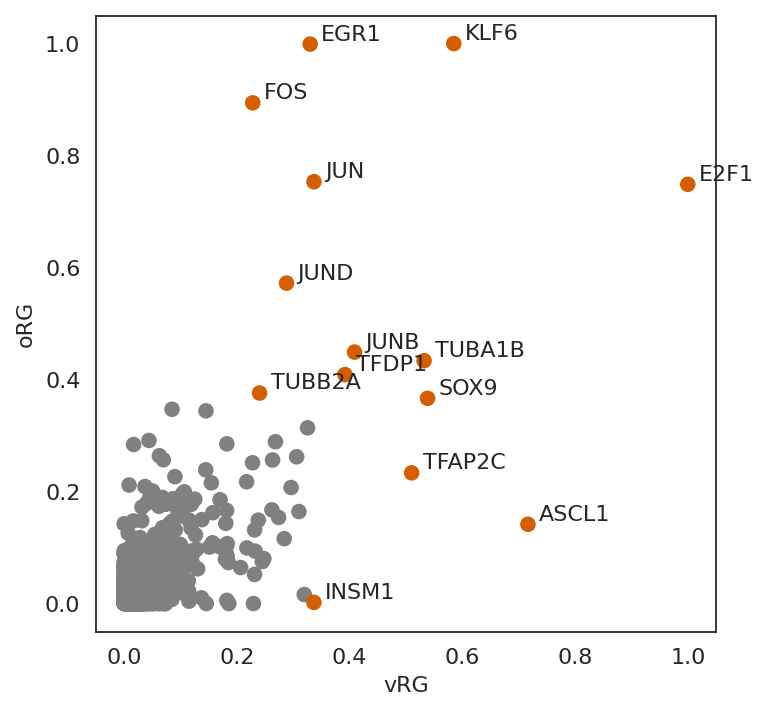

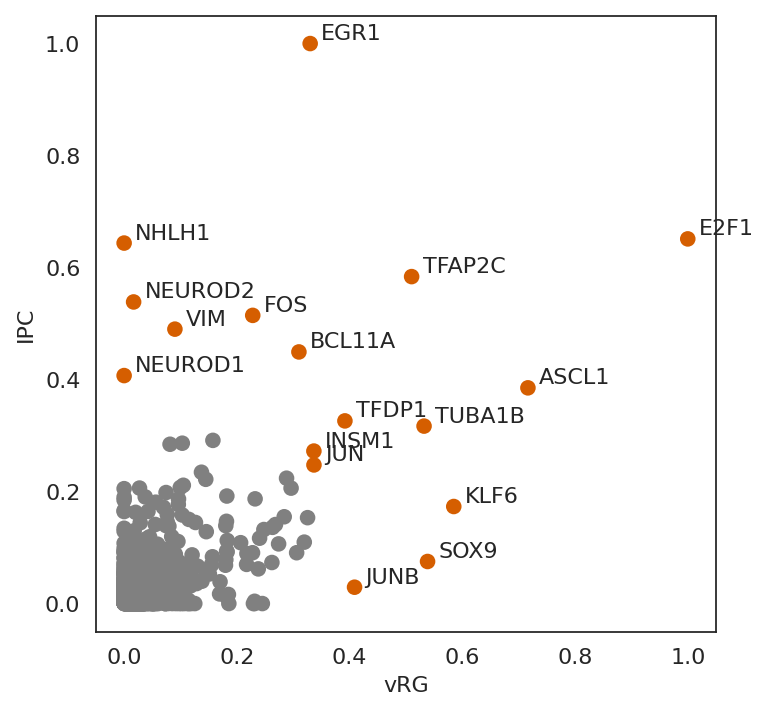

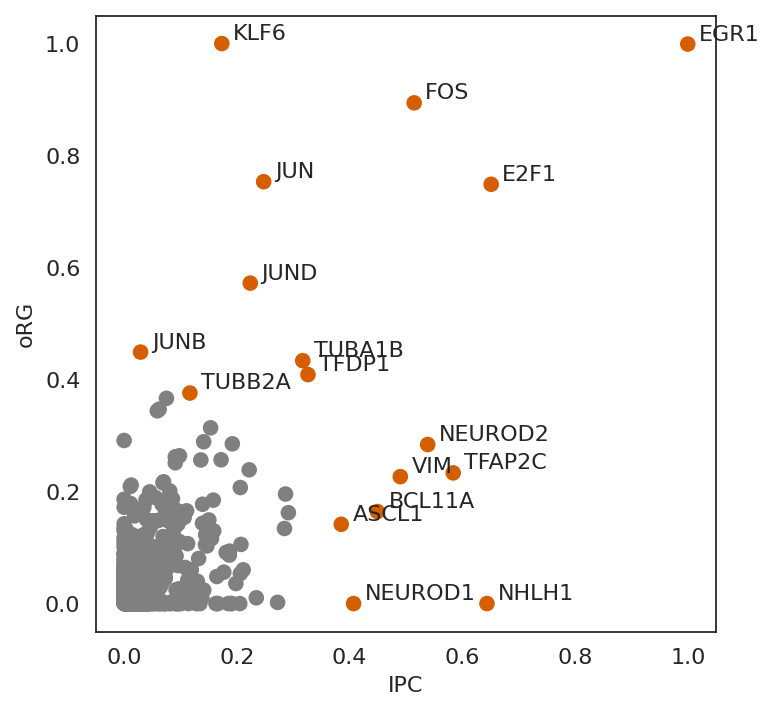

In [30]:
plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='oRG')

plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='IPC')

plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='IPC', cluster2='oRG')

## Polioudakis 2019

In [2]:
path_pol19_links = '/home/jovyan/jm_jlab/data_indNeuro/1.GRN/pol19_baggingridge.links.celloracle.links'

In [3]:
pol19_links = co.load_hdf5(file_path=path_pol19_links)

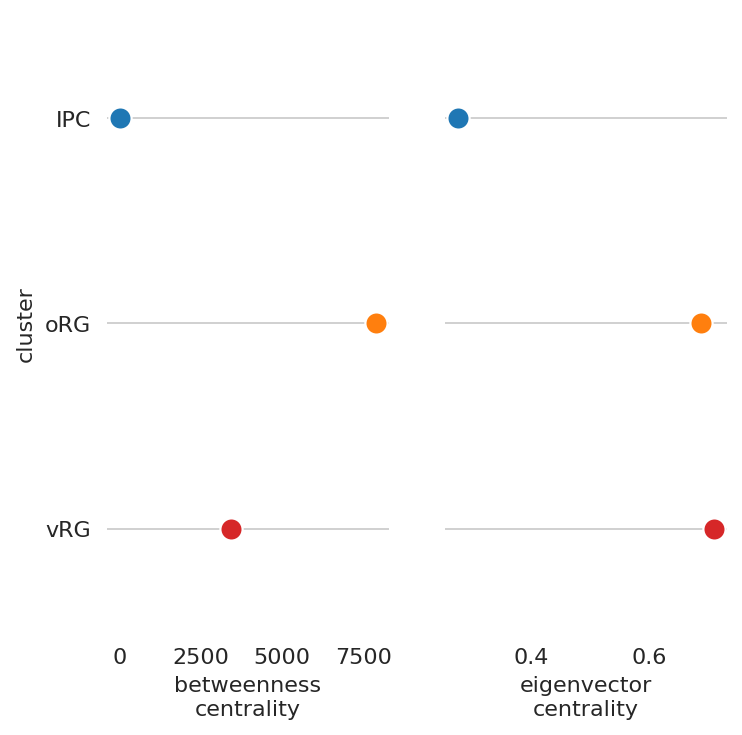

In [5]:
plt.figure(figsize=(5, 5), dpi=80)

goi = "KLF6"
res = pol19_links.merged_score[pol19_links.merged_score.index==goi].copy()
res = res[res['cluster'] != "transient"].copy()

res = res.rename(columns={"betweenness_centrality": "betweenness\ncentrality",
             "eigenvector_centrality": "eigenvector\ncentrality"})
# make plots
values = ["betweenness\ncentrality",
          "eigenvector\ncentrality"]


for i, value in zip([1, 2], values):
        plt.subplot(1, 2,  i)
        ax = sns.stripplot(data=res, y="cluster", x=value,
                      size=10, orient="h",linewidth=1, edgecolor="w",
                      order=np.array(['IPC', 'oRG', 'vRG']), # Remove 'transient'
                      palette=dict(pol19_links.palette.palette))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.yaxis.grid(True)
        ax.tick_params(bottom=False,
                        left=False,
                        right=False,
                        top=False)
        if i > 1:
            plt.ylabel(None)
            ax.tick_params(labelleft=False)

plt.show()

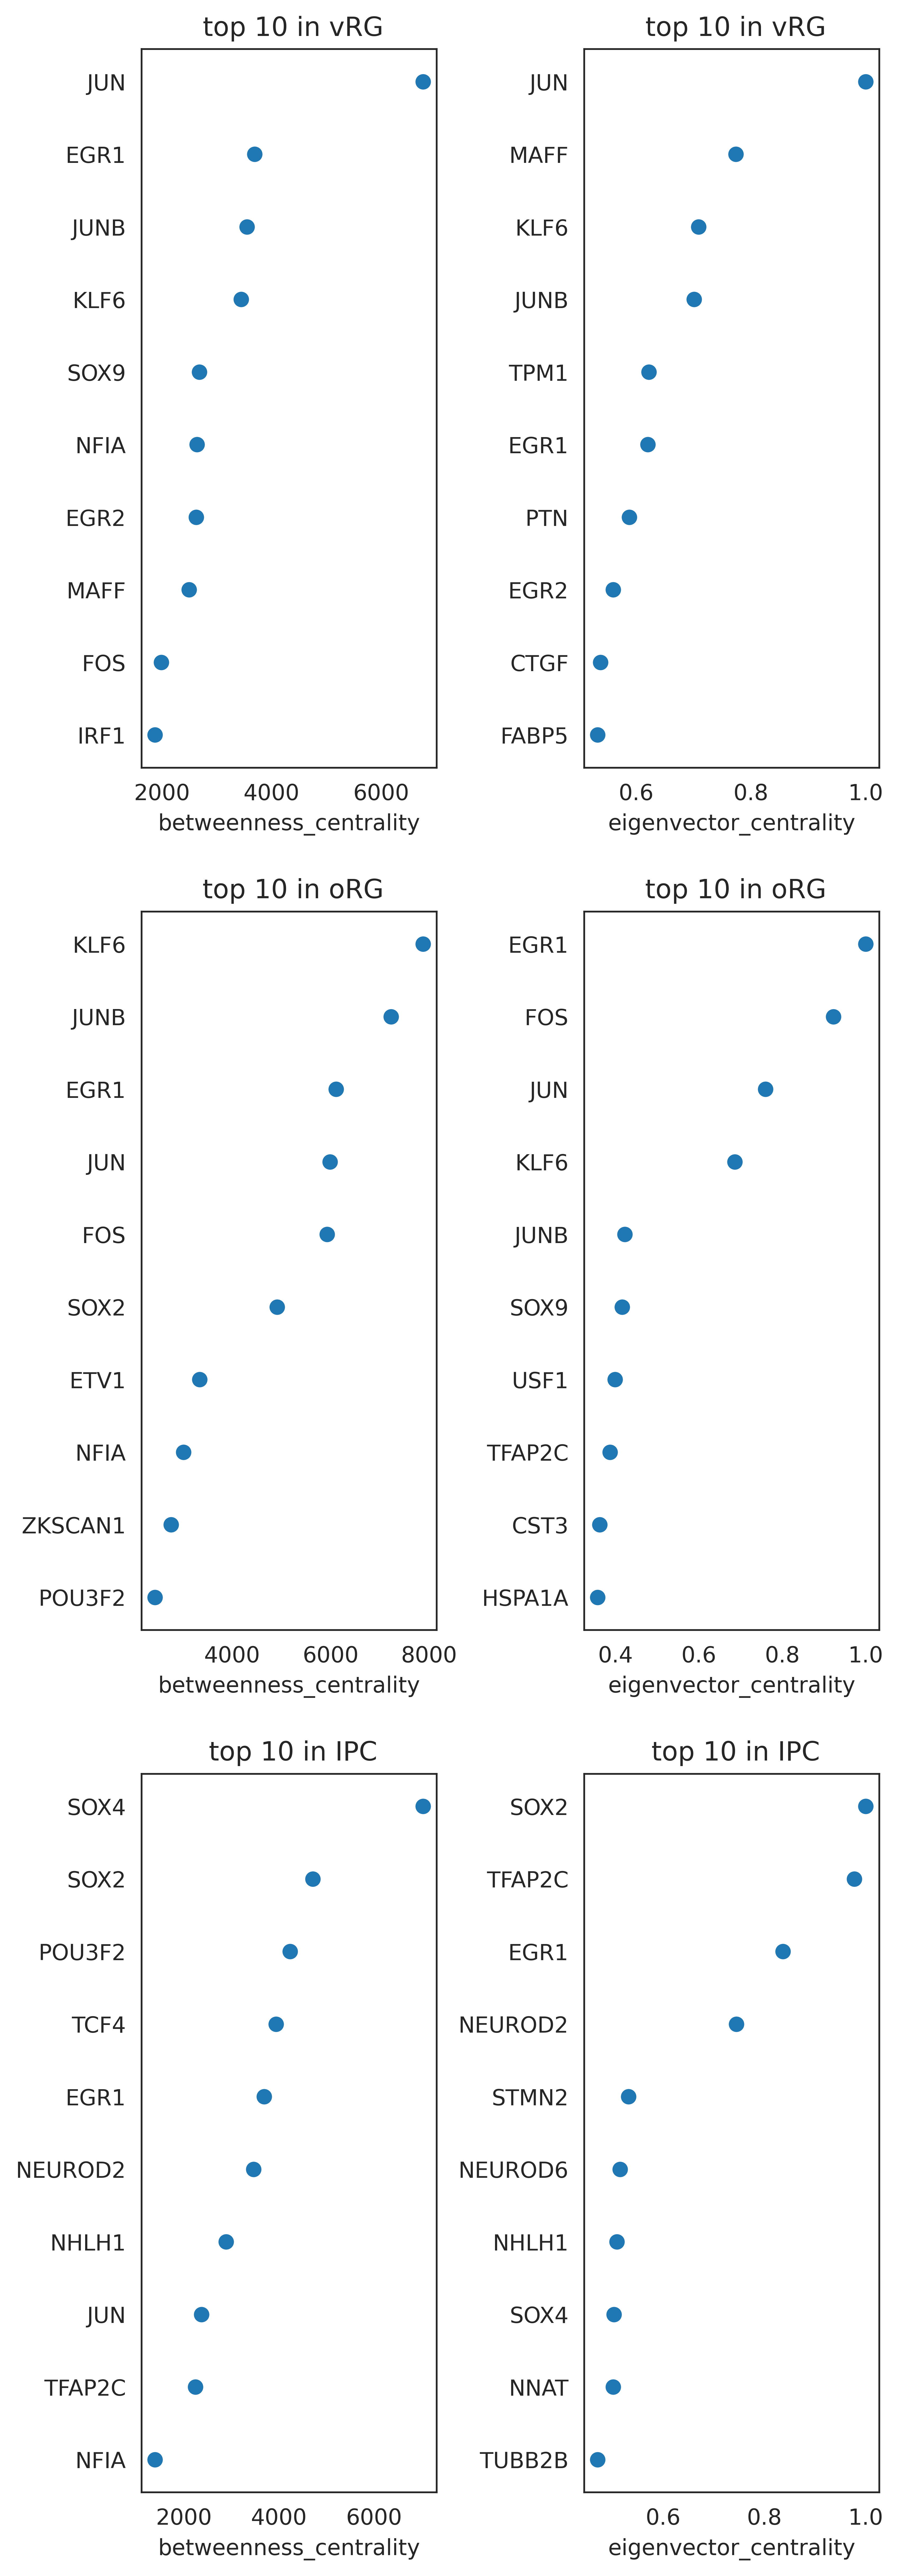

In [6]:
n_gene = 10
values = ['betweenness_centrality',  'eigenvector_centrality']

fig, axs = plt.subplots(3, 2, figsize=(6, 20), dpi=300)

cluster = 'vRG'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[0,0].scatter(res.values, range(len(res)))
axs[0,0].set_yticks(range(len(res)))
axs[0,0].set_yticklabels(res.index.values)
axs[0,0].set_xlabel(values[0])
axs[0,0].set_title(f" top {n_gene} in {cluster}")
axs[0,0].invert_yaxis()

cluster = 'vRG'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[0,1].scatter(res.values, range(len(res)))
axs[0,1].set_yticks(range(len(res)))
axs[0,1].set_yticklabels(res.index.values)
axs[0,1].set_xlabel(values[1])
axs[0,1].set_title(f" top {n_gene} in {cluster}")
axs[0,1].invert_yaxis()

cluster = 'oRG'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[1,0].scatter(res.values, range(len(res)))
axs[1,0].set_yticks(range(len(res)))
axs[1,0].set_yticklabels(res.index.values)
axs[1,0].set_xlabel(values[0])
axs[1,0].set_title(f" top {n_gene} in {cluster}")
axs[1,0].invert_yaxis()

cluster = 'oRG'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[1,1].scatter(res.values, range(len(res)))
axs[1,1].set_yticks(range(len(res)))
axs[1,1].set_yticklabels(res.index.values)
axs[1,1].set_xlabel(values[1])
axs[1,1].set_title(f" top {n_gene} in {cluster}")
axs[1,1].invert_yaxis()


cluster = 'IPC'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[0]].sort_values(ascending=False)
res = res[:n_gene]
axs[2,0].scatter(res.values, range(len(res)))
axs[2,0].set_yticks(range(len(res)))
axs[2,0].set_yticklabels(res.index.values)
axs[2,0].set_xlabel(values[0])
axs[2,0].set_title(f" top {n_gene} in {cluster}")
axs[2,0].invert_yaxis()

cluster = 'IPC'
res = pol19_links.merged_score[pol19_links.merged_score.cluster == cluster]
res = res[values[1]].sort_values(ascending=False)
res = res[:n_gene]
axs[2,1].scatter(res.values, range(len(res)))
axs[2,1].set_yticks(range(len(res)))
axs[2,1].set_yticklabels(res.index.values)
axs[2,1].set_xlabel(values[1])
axs[2,1].set_title(f" top {n_gene} in {cluster}")
axs[2,1].invert_yaxis()


plt.subplots_adjust(wspace=0.5)

In [29]:
def plot_indNeuro_GRNmeasures(links, 
                              value, 
                              cluster1, 
                              cluster2, 
                              percentile=99, 
                              fillna_with_zero=True):
    """
   Scatter plot similar to that available from CellOracle but highlighting top genes
    Args:
        links (Links object): See network_analisis.Links class for detail.
        value (srt): The network score to be shown.
        cluster1 (str): Cluster nome to analyze. Network scores in the cluste1 are shown as x-axis.
        cluster2 (str): Cluster nome to analyze. Network scores in the cluste2 are shown as y-axis.
        percentile (float): Genes with a network score above the percentile will be shown with annotation. Default is 99.
    """

    res = links.merged_score[links.merged_score.cluster.isin([cluster1, cluster2])][[value, "cluster"]]
    res = res.reset_index(drop=False)
    piv = pd.pivot_table(res, values=value, columns="cluster", index="index")
    if fillna_with_zero:
        piv = piv.fillna(0)
    else:
        piv = piv.fillna(piv.mean(axis=0))

    goi1 = piv[piv[cluster1] > np.percentile(piv[cluster1].values, percentile)].index
    goi2 = piv[piv[cluster2] > np.percentile(piv[cluster2].values, percentile)].index
    gois = np.union1d(goi1, goi2)

    x, y = piv[cluster1], piv[cluster2]
    
    y1 = pd.DataFrame(y)

    x1 = pd.DataFrame(x)
    xy = pd.merge(x1, y1, on='index')

    # find top 10 values for cluster 1 and cluster 2
    top10_cluster1 = xy.nlargest(10, cluster1)
    top10_cluster2 = xy.nlargest(10, cluster2)

    # create a boolean column that is TRUE for genes in top 10 in either cluster 1 or cluster 2
    xy['top10'] = False
    xy.loc[top10_cluster1.index, 'top10'] = True
    xy.loc[top10_cluster2.index, 'top10'] = True

    #Better visualization of top values
    binary_colors = ['#d55e00' if top10 else '#808080' for top10 in xy['top10']]
    
    plt.scatter(xy[cluster1], xy[cluster2], c=binary_colors) #top10 for each cluster

    for gene_name in xy.index[xy['top10'] == True]:
        plt.annotate(gene_name, (xy.loc[gene_name, cluster1], xy.loc[gene_name, cluster2]), 
                 textcoords='offset points', 
                 xytext=(5,0), 
                 ha='left', 
                 va='bottom')

    plt.xlabel(cluster1)
    plt.ylabel(cluster2)
    plt.title("")

    # show the plot
    plt.show()

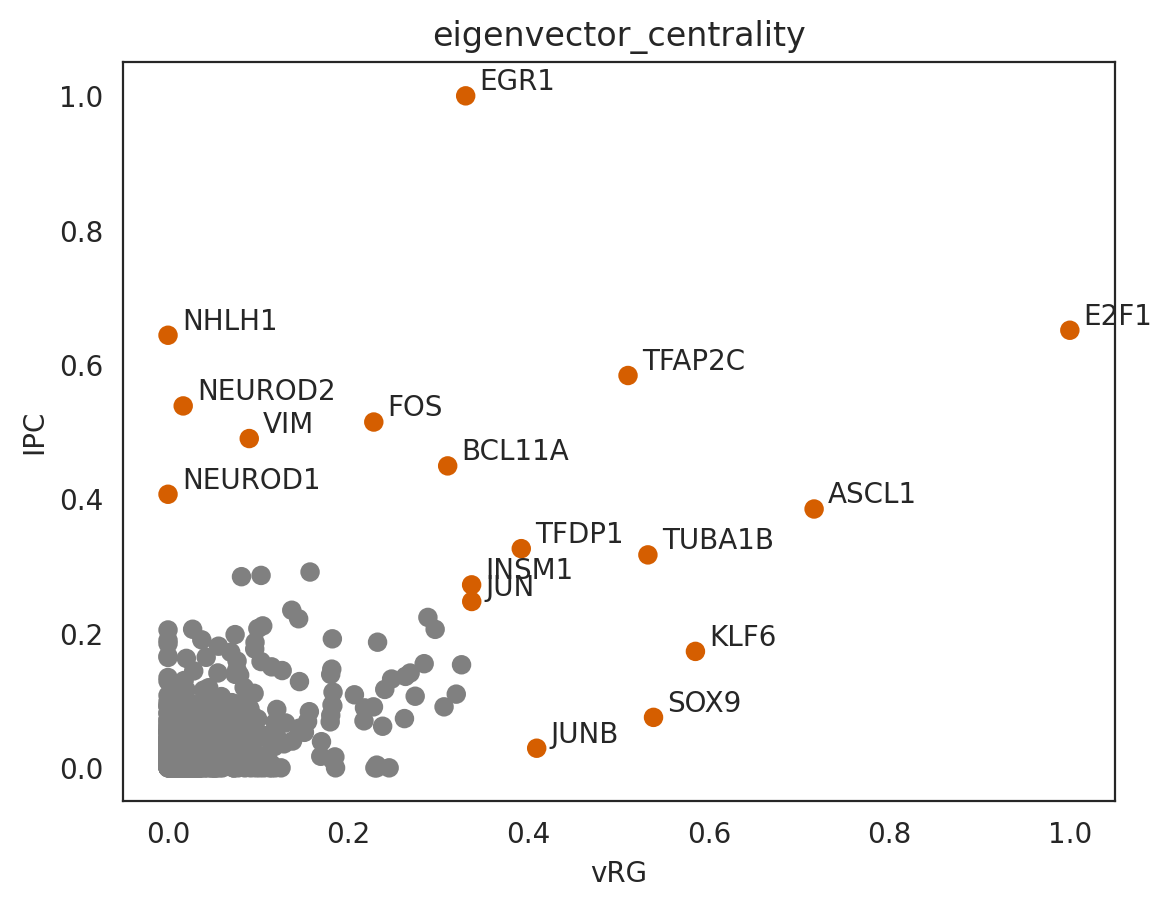

In [148]:
plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='IPC')

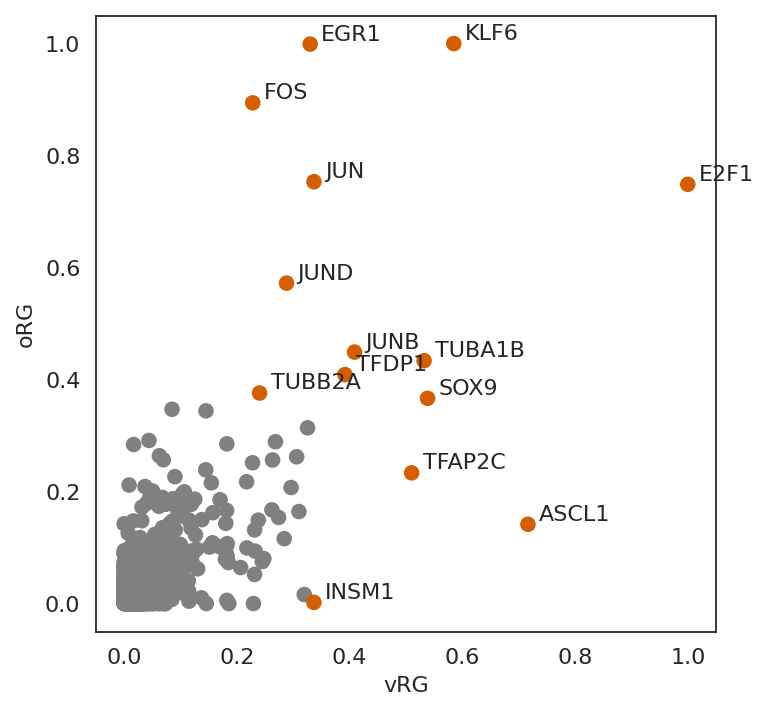

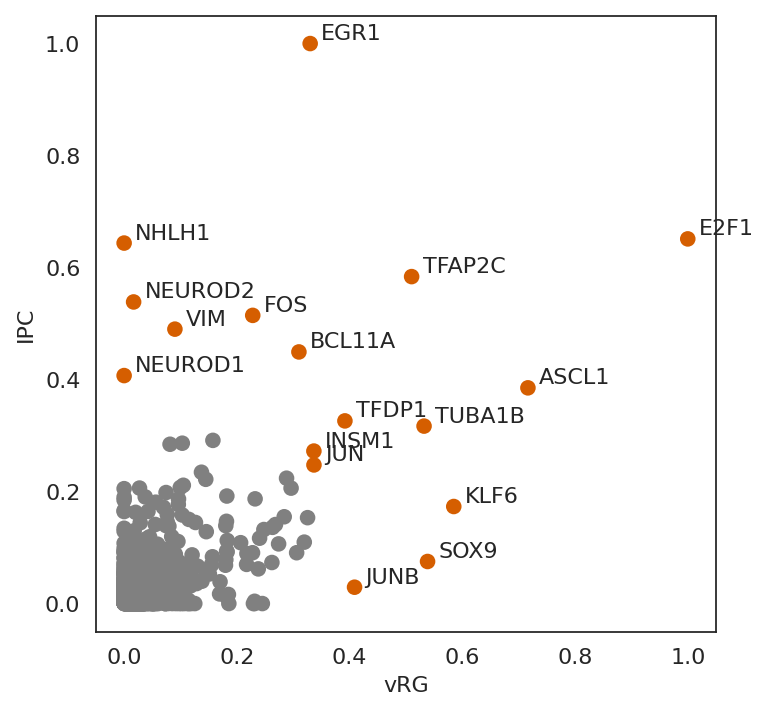

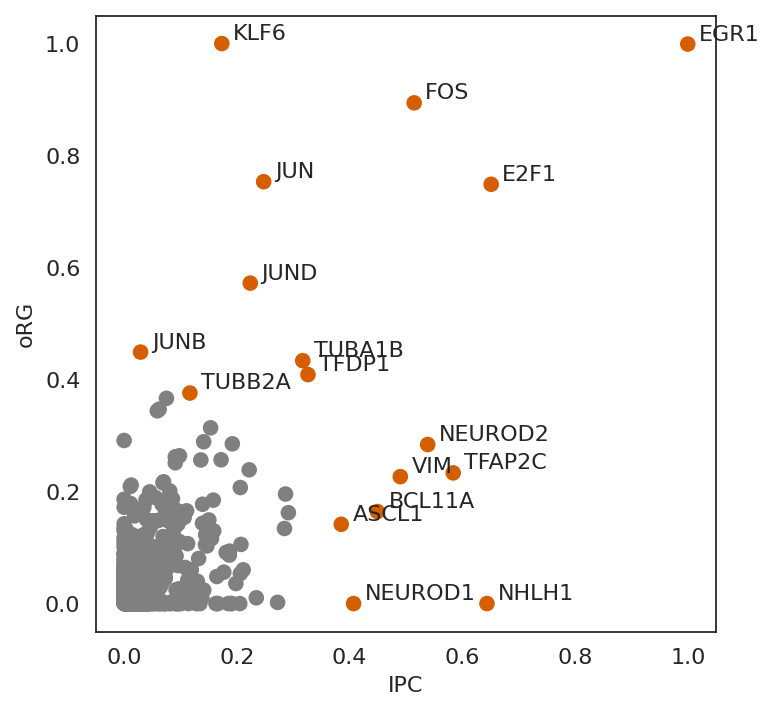

In [30]:
plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='oRG')

plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='vRG', cluster2='IPC')

plt.figure(figsize=(5, 5), dpi=80)

plot_indNeuro_GRNmeasures(links, value="eigenvector_centrality", cluster1='IPC', cluster2='oRG')